In [80]:
#Manipulando dados
import pandas as pd

#Visualizando
import missingno
import matplotlib.pyplot as plt
import seaborn as sns


#Utilizando machine learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Carregando os dados


In [3]:
df = pd.read_csv("KAG_conversion_data.csv")


In [4]:
type(df)

pandas.core.frame.DataFrame

Inspeção do Projeto


In [5]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
df.tail()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


In [7]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=1143, step=1)

In [9]:
df.shape

(1143, 11)

In [10]:
linhas, colunas = df.shape

In [11]:
print(f"O numero de linhas e {linhas}")

O numero de linhas e 1143


In [12]:
linhas

1143

In [13]:
colunas

11

In [14]:
ser_interest = df["interest"]

In [15]:
type(ser_interest)

pandas.core.series.Series

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [19]:
df.rename(columns={"ad_id": "id_anuncio", "xyz_campaign_id": "id_campanha", "fb_campaign_id": "fb_campanha"}, inplace=True)
df.head()

,id_anuncio,id_campanha,fb_campanha,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


###Informações Estatísticas

In [20]:
df.describe()

,id_anuncio,id_campanha,fb_campanha,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [21]:
df.describe(include="all")

,id_anuncio,id_campanha,fb_campanha,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143,1143,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
unique,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,30-34,M,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,426,592,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.872611e+05,1067.382327,133783.989501,NaN,NaN,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,NaN,NaN,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,NaN,NaN,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,NaN,NaN,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,NaN,NaN,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,NaN,NaN,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000


###Dados Faltantes

In [26]:
df.isnull().sum()

id_anuncio             0
id_campanha            0
fb_campanha            0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

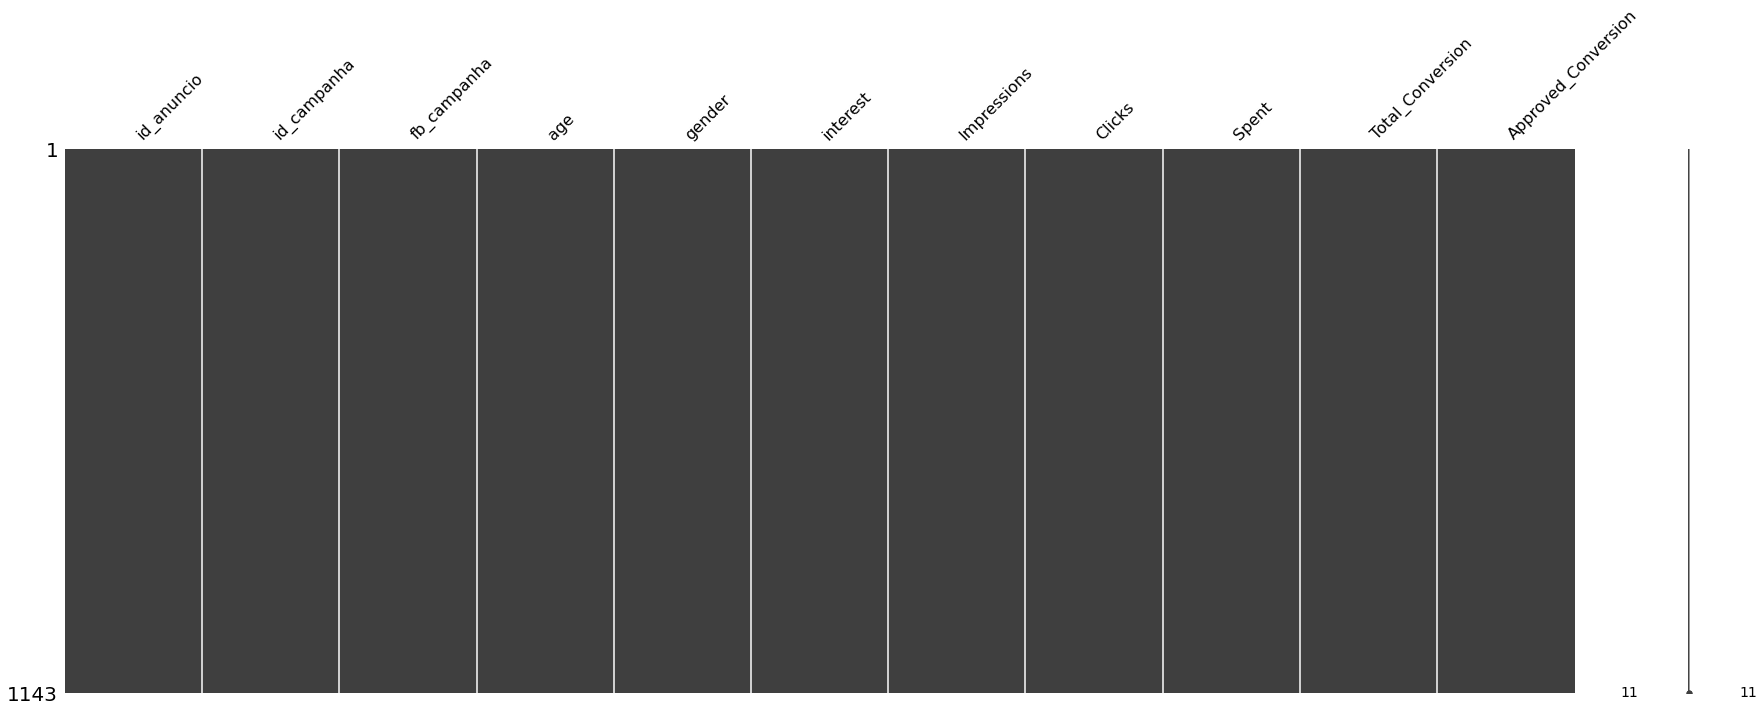

In [29]:
missingno.matrix(df, figsize= (30,10))

###Outliers(dados discrepantes)

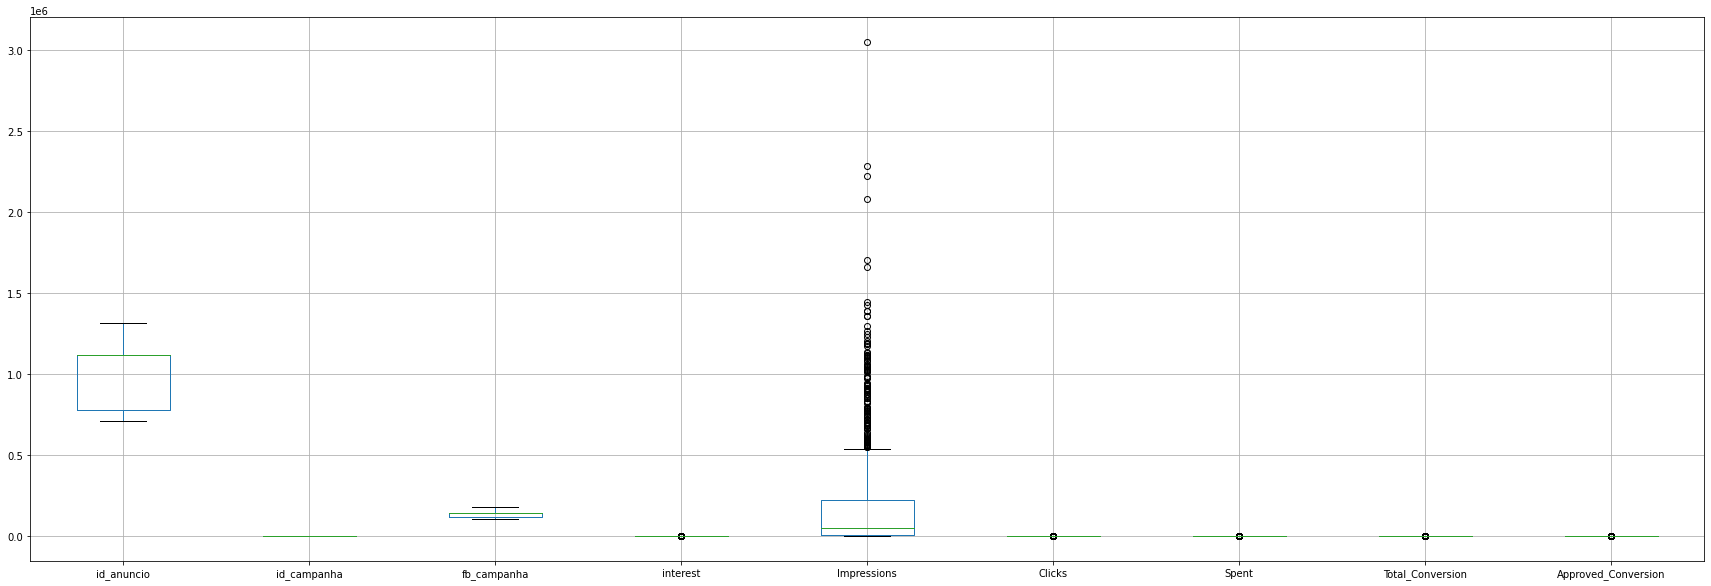

In [32]:
plt.figure(figsize=(30,10))
df.boxplot()
plt.show()

###Duplicatas

In [34]:
df[df.duplicated()]

,id_anuncio,id_campanha,fb_campanha,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion


###Matriz Correlação

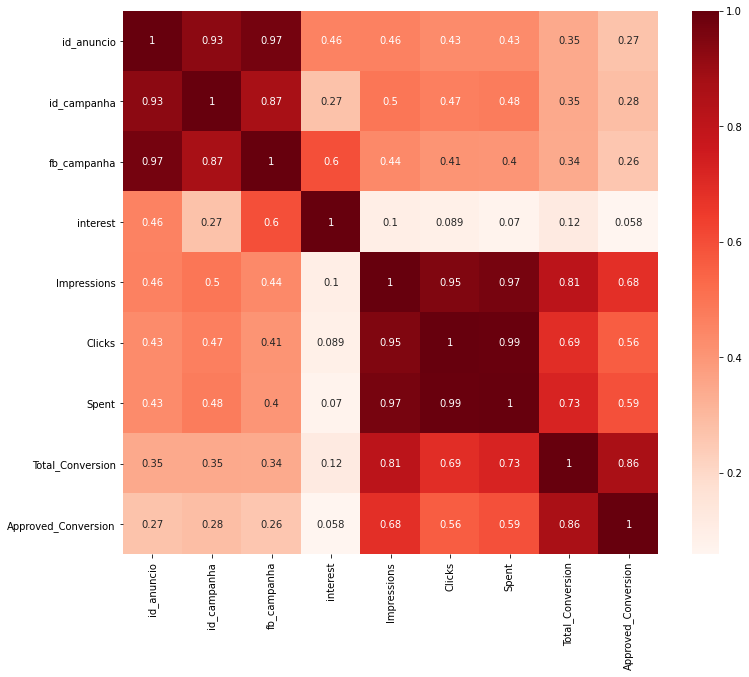

In [37]:
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

###Avaliando as Features

###id_campanha - ID associado a cada campanha da empresa XYZ

In [38]:
df["id_campanha"].nunique()

3

In [39]:
df["id_campanha"].unique()

array([ 916,  936, 1178])

In [44]:
df["id_campanha"].replace({916:"campanha1", 936:"campanha2", 1178:"campanha3"}, inplace=True)

In [45]:
df.head()

,id_anuncio,id_campanha,fb_campanha,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campanha1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campanha1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campanha1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campanha1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campanha1,103928,30-34,M,28,4133,1,1.29,1,1


In [46]:
df.tail()

,id_anuncio,id_campanha,fb_campanha,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,campanha3,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,campanha3,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,campanha3,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,campanha3,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,campanha3,179982,45-49,F,114,513161,114,165.609999,5,2


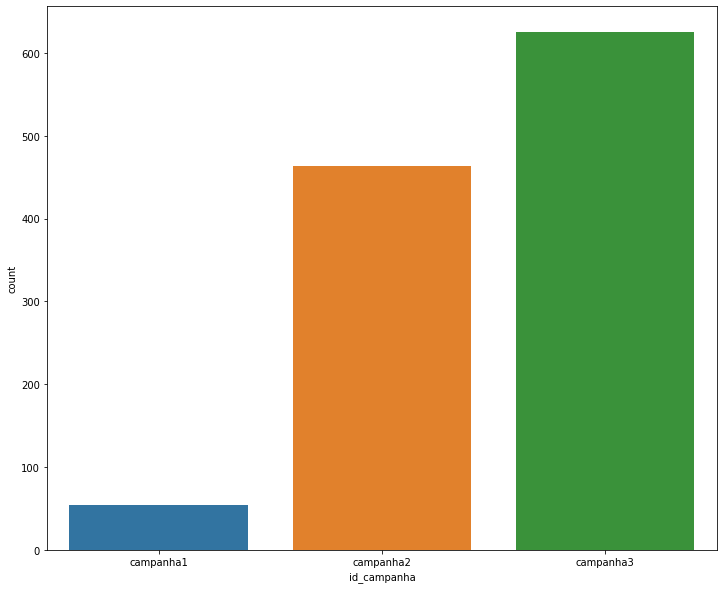

In [48]:
plt.figure(figsize=(12,10))
sns.countplot(x="id_campanha",data=df)
plt.show()

####Campanha 3 tem o maior número de anúncios

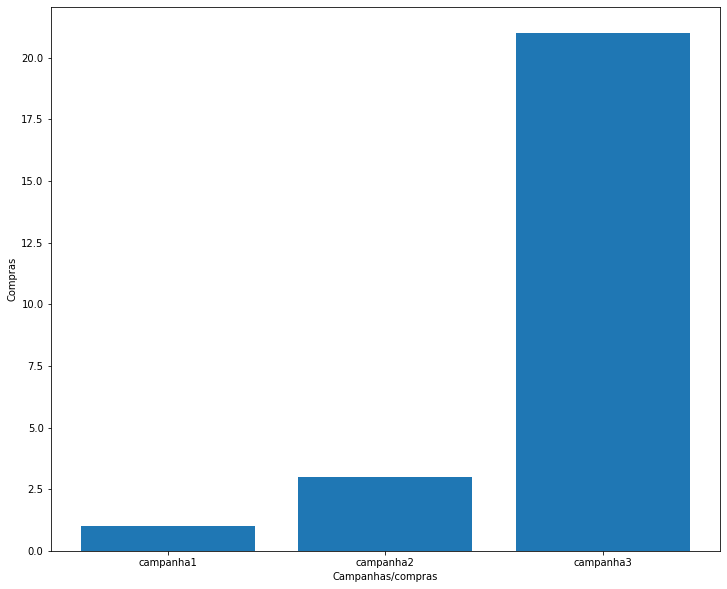

In [49]:
plt.figure(figsize=(12,10))
plt.bar(df["id_campanha"], df["Approved_Conversion"])
plt.ylabel("Compras")
plt.xlabel("Campanhas/compras")
plt.show()

####Idade - idade da pessoa a quem o anúncio é mostrado

In [50]:
df["age"].nunique()

4

In [51]:
df["age"].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

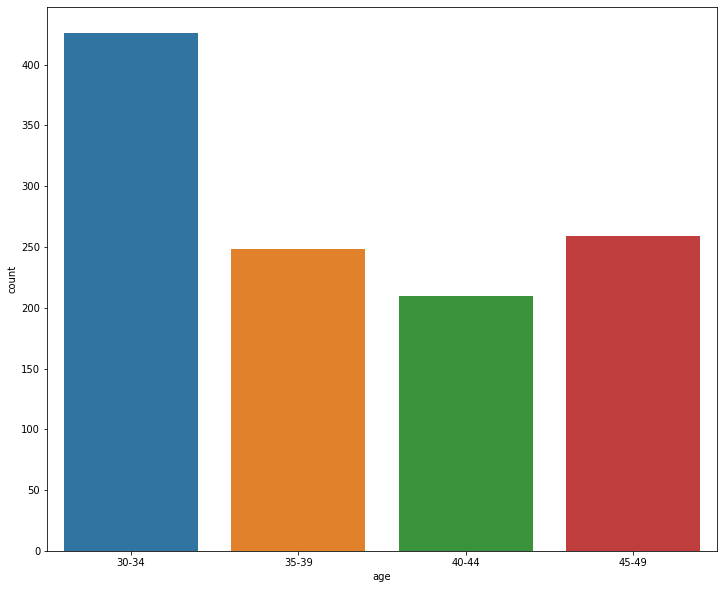

In [52]:
plt.figure(figsize=(12,10))
sns.countplot(x = "age", data=df)
plt.show()

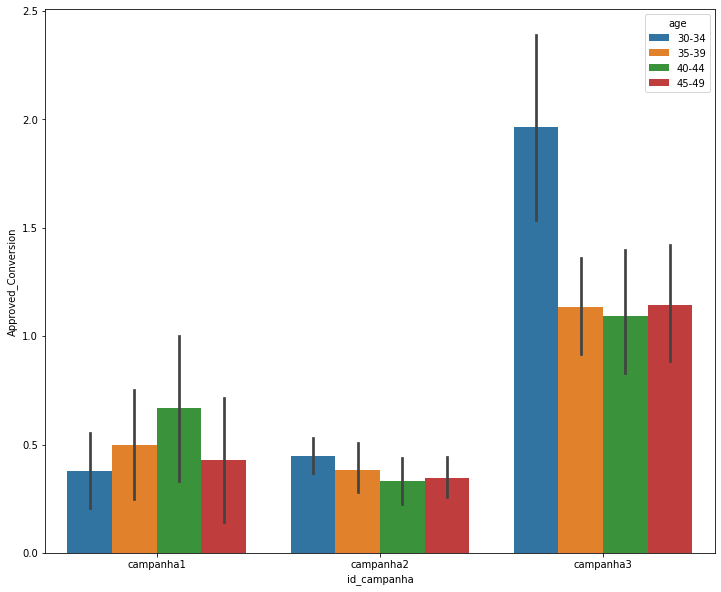

In [53]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=df ["id_campanha"], y=df["Approved_Conversion"], hue=df["age"], data=tips)
plt.show()

####Gênero - sexo da pessoa que deseja que o anúncio seja mostrado

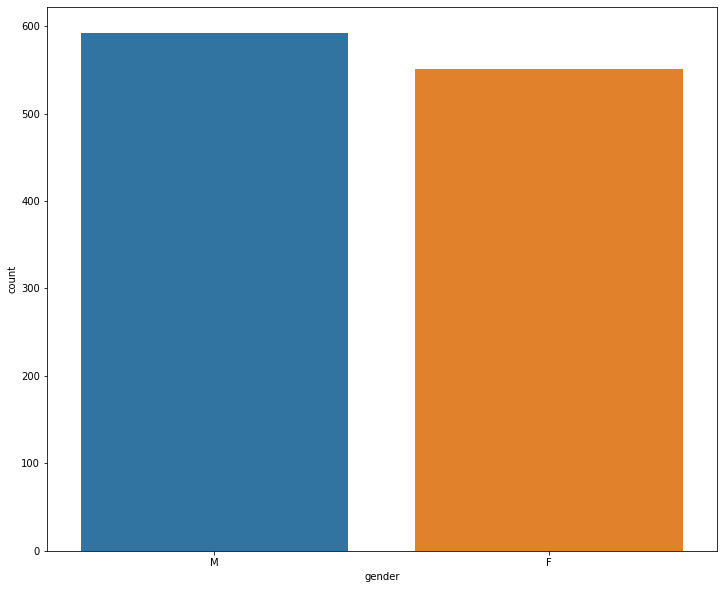

In [54]:
plt.figure(figsize=(12,10))
sns.countplot(x="gender", data=df)
plt.show()

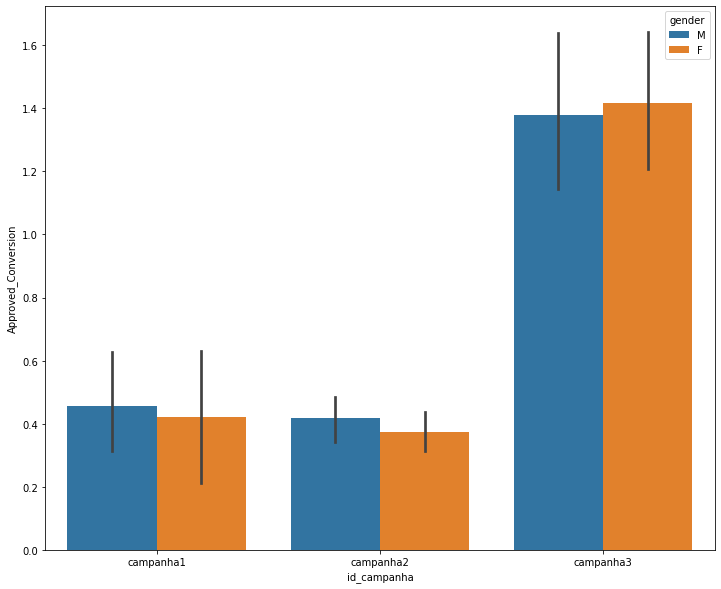

In [55]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=df ["id_campanha"], y=df["Approved_Conversion"], hue=df["gender"], data=tips)
plt.show()

##Etapa 4: Modelagem/Machine Learning

In [57]:
df.shape

(1143, 11)

In [58]:
amostra_df = df.sample(n=20)

In [59]:
amostra_df.shape

(20, 11)

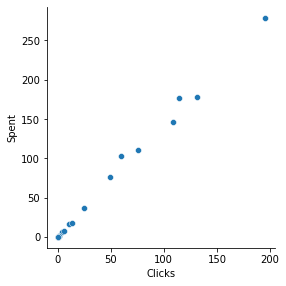

In [60]:
sns.pairplot(amostra_df, x_vars=["Clicks"], y_vars=["Spent"], height=4, kind="scatter")
plt.show()

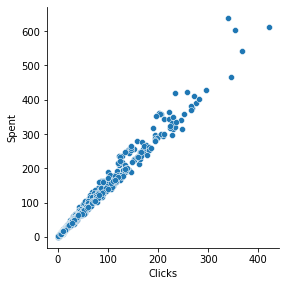

In [61]:
sns.pairplot(df, x_vars=["Clicks"], y_vars=["Spent"], height=4, kind="scatter")
plt.show()

In [62]:
df = df.replace('30-34',0.0011)
df = df.replace('35-39',0.0012)
df = df.replace('40-44',0.0013)
df = df.replace('45-49',0.0014)

In [63]:
df.head()

,id_anuncio,id_campanha,fb_campanha,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campanha1,103916,0.0011,M,15,7350,1,1.43,2,1
1,708749,campanha1,103917,0.0011,M,16,17861,2,1.82,2,0
2,708771,campanha1,103920,0.0011,M,20,693,0,0.00,1,0
3,708815,campanha1,103928,0.0011,M,28,4259,1,1.25,1,0
4,708818,campanha1,103928,0.0011,M,28,4133,1,1.29,1,1


In [64]:
df.tail()

,id_anuncio,id_campanha,fb_campanha,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,campanha3,179977,0.0014,F,109,1129773,252,358.189997,13,2
1139,1314411,campanha3,179978,0.0014,F,110,637549,120,173.880003,3,0
1140,1314412,campanha3,179979,0.0014,F,111,151531,28,40.289999,2,0
1141,1314414,campanha3,179981,0.0014,F,113,790253,135,198.710000,8,2
1142,1314415,campanha3,179982,0.0014,F,114,513161,114,165.609999,5,2


In [67]:
df = df.replace('M',1)
df = df.replace('F',0)

In [68]:
df.head()

,id_anuncio,id_campanha,fb_campanha,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campanha1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha1,103928,0.0011,1,28,4133,1,1.29,1,1


In [69]:
 X = df[['age', 'gender', 'interest','Impressions', 'Clicks']]

In [70]:
Y = df['Spent']

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 32)

In [76]:
X_train.shape

(800, 5)

In [77]:
X_test.shape

(343, 5)

In [78]:
X_train.head()

,age,gender,interest,Impressions,Clicks
640,0.0012,1,21,271091,42
852,0.0011,0,24,185665,39
311,0.0013,1,29,10090,2
803,0.0014,1,29,563074,86
105,0.0014,0,10,73634,23


In [79]:
Y_train.head()

640     78.040000
852     62.140001
311      2.650000
803    142.709999
105     32.980000
Name: Spent, dtype: float64

In [81]:
model = LinearRegression()

In [82]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
model.coef_

array([ 1.11543951e+04,  2.54714226e+00, -6.87113770e-02,  8.85162529e-05,
        1.06012421e+00])

In [85]:
model.intercept_

-13.191111867749427

###Coeficientes da equação y = ax + b acima

In [86]:
model.score(X_test, Y_test)*100

99.4899077013531

###Predição para Campanhas no Facebook

In [87]:
df.head()

,id_anuncio,id_campanha,fb_campanha,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campanha1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha1,103928,0.0011,1,28,4133,1,1.29,1,1


In [92]:
age = float(input("Idade:"))

Idade:0.0011


In [94]:
age

0.0011

In [96]:
gender = int(input("Genero:"))
interest = int(input("Interesse:"))
Impressions = int(input("Exibições:"))
Clicks = int(input("Cliques no anuncio:"))


Genero:1
Interesse:28
Exibições:8000
Cliques no anuncio:1


In [97]:
pred = model.predict([[age, gender, interest, Impressions, Clicks]])

###Valor pago para mostrar o anúncio apenas uma vez para uma pessoa de 30 a 34 anos, do gênero masculino, dentre 8000 exibições listado abaixo

In [98]:
print(pred)

[1.47020066]
